In [ ]:
-- 1. ¿Que ciudad/Pais ha generado el mayor volumen de ventas?

SELECT A.City, A.CountryRegion, SUM(OD.OrderQty) AS num_ventas_totales
FROM SalesLT.Address A
JOIN SalesLT.SalesOrderHeader OH ON OH.ShipToAddressID = A.AddressID
JOIN SalesLT.SalesOrderDetail OD ON OD.SalesOrderID = OH.SalesOrderID
GROUP BY A.City, A.CountryRegion 
ORDER BY num_ventas_totales DESC;

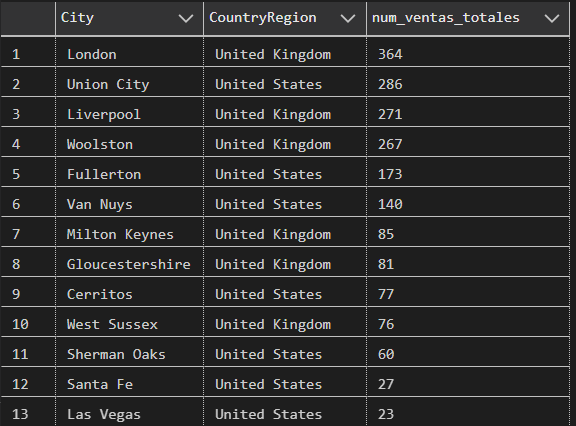

In [ ]:
-- 2. ¿Cuáles son los accesorios/bicicletas mas vendidos? 

SELECT P.Name, OD.SalesOrderID, OD.UnitPrice, OD.LineTotal, SUM(OD.OrderQty) AS num_ventas_totales
FROM SalesLT.SalesOrderDetail OD
JOIN SalesLT.Product P ON OD.ProductID = P.ProductID
GROUP BY P.Name, OD.SalesOrderID, OD.LineTotal, OD.UnitPrice
ORDER BY num_ventas_totales DESC;

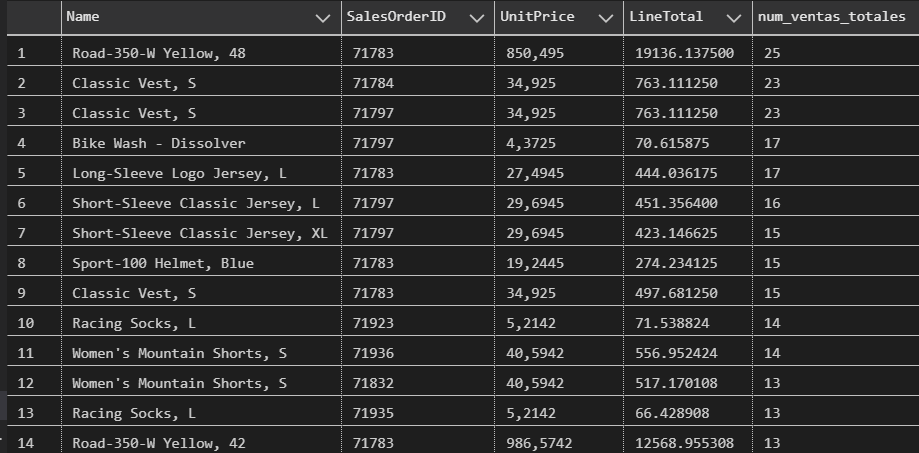

In [ ]:
-- 3. ¿Que producto tiene mas ventas, las bicicletas, los componentes, ropa o los accesorios?

SELECT PC.Name, OD.ProductID, OD.Linetotal, OD.UnitPrice, P.ListPrice, SUM(OD.OrderQty) AS num_ventas_totales
FROM SalesLT.Product P
JOIN SalesLT.ProductCategory PC ON PC.ProductCategoryID = P.ProductCategoryID
JOIN SalesLT.SalesOrderDetail OD ON OD.ProductID = P.ProductID
GROUP BY PC.Name, OD.ProductID, OD.Linetotal, OD.UnitPrice, P.ListPrice
ORDER BY num_ventas_totales DESC;

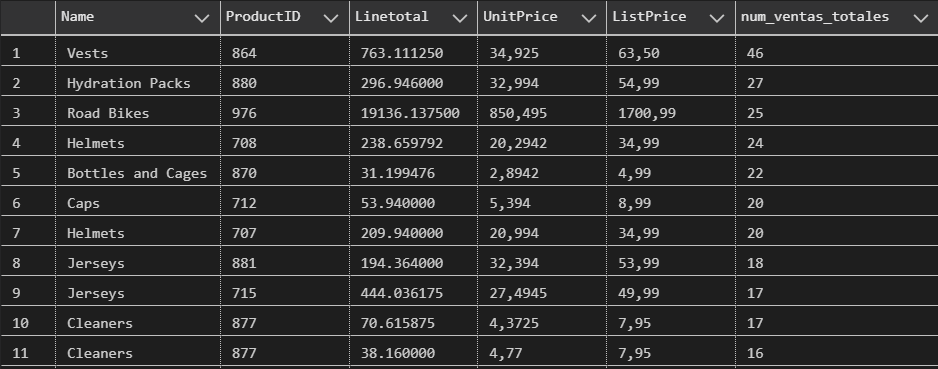

In [ ]:
-- 4. ¿Cuáles son los 10 clientes o compañias con el mayor numero de transacciones?

WITH UniqueOrderQty AS (
    SELECT SalesOrderID, SUM(DISTINCT OD.OrderQty) AS num_ventas_totales
    FROM SalesLT.SalesOrderDetail OD
    GROUP BY SalesOrderID
)
SELECT CA.AddressID, C.CompanyName, C.CustomerID, OD.SalesOrderID, UO.num_ventas_totales
FROM SalesLT.Customer C
JOIN SalesLT.CustomerAddress CA ON CA.CustomerID = C.CustomerID
JOIN SalesLT.SalesOrderHeader OH ON OH.ShipToAddressID = CA.AddressID
JOIN SalesLT.SalesOrderDetail OD ON OD.SalesOrderID = OH.SalesOrderID
JOIN UniqueOrderQty UO ON UO.SalesOrderID = OD.SalesOrderID
GROUP BY C.CompanyName, C.CustomerID, OD.SalesOrderID, CA.AddressID, UO.num_ventas_totales
ORDER BY UO.num_ventas_totales DESC;




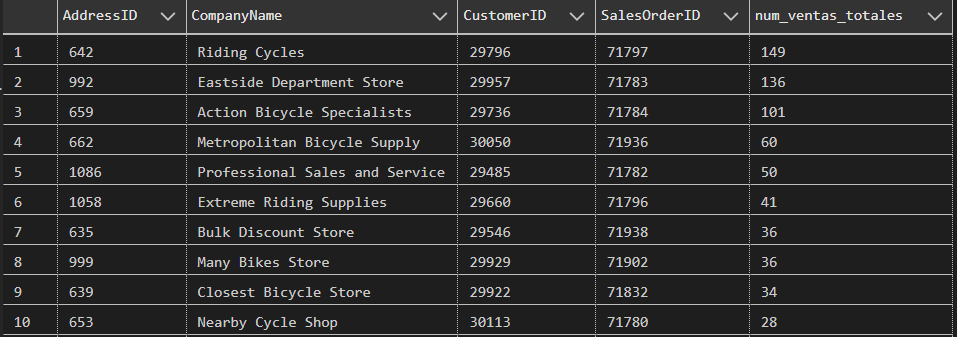

In [ ]:
-- 5. ¿Cual es el gasto promedio por cliente o compañia en una compra?

SELECT Subquery.CustomerID, Subquery.CompanyName, AVG(Subquery.TotalGasto) AS GastoPromedio
FROM (
    SELECT C.CustomerID, C.CompanyName, SUM(OD.OrderQty * OD.UnitPrice) AS TotalGasto
    FROM SalesLT.Customer C
    JOIN SalesLT.CustomerAddress CA ON CA.CustomerID = C.CustomerID
    JOIN SalesLT.SalesOrderHeader OH ON OH.ShipToAddressID = CA.AddressID
    JOIN SalesLT.SalesOrderDetail OD ON OD.SalesOrderID = OH.SalesOrderID
    GROUP BY C.CustomerID, C.CompanyName
) AS Subquery
GROUP BY Subquery.CustomerID, Subquery.CompanyName
ORDER BY GastoPromedio DESC;



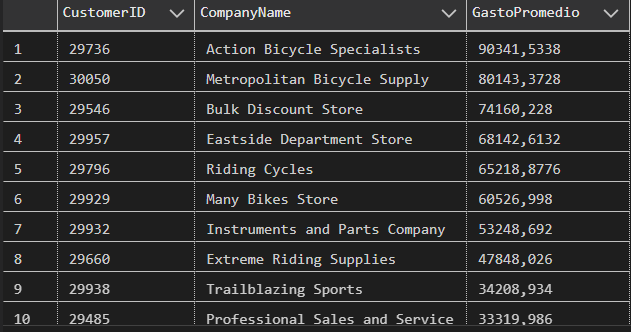